In [14]:
import os
import pandas as pd
import numpy as np
import csv
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle


from unets import unet

In [15]:
# dataset = np.load('datasets/dataset.npy',allow_pickle='TRUE').item()
dataset = np.load('datasets/dataset_25.npy',allow_pickle='TRUE').item()

In [16]:
dataset['VIGNET_NOISELESS'].shape

(25000, 52, 52)

In [17]:
im_train, im_val, target_train, target_val = train_test_split(dataset['VIGNETS_WITH_NOISE'], dataset['VIGNET_NOISELESS'],
                                                              test_size=0.2, random_state=10)

im_train, target_train = shuffle(im_train, target_train)
im_val, target_val = shuffle(im_val, target_val)

im_train = (tf.reshape(tf.convert_to_tensor(im_train), [20000, 51, 51, 1])-np.mean(im_train))/255
target_train = tf.reshape(tf.convert_to_tensor(target_train), [20000, 51, 51, 1])
im_val = (tf.reshape(tf.convert_to_tensor(im_val), [5000, 51, 51, 1])-np.mean(im_val))/255
target_val = tf.reshape(tf.convert_to_tensor(target_val), [5000, 51, 51, 1])

In [18]:
n_channels=1
model=unet(input_size=(51,51,n_channels), lr=1e-3, bn=True, layers_n_channels=1)

In [ ]:
history = model.fit(im_train, target_train, validation_data=(im_val, target_val), batch_size=4, 
           epochs=50, steps_per_epoch=100)

plt.plot(history.history['loss'], label='Loss (training data)')
plt.plot(history.history['val_loss'], label='Loss (validation data)')
plt.title('Loss of the Unets on the PSF Dataset')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

Epoch 1/50
100/100 [==============================] - 19s 184ms/step - loss: 1.1252e-05 - keras_psnr: 49.7928 - keras_ssim: 0.9633 - val_loss: 9.9985e-06 - val_keras_psnr: 50.2457 - val_keras_ssim: 0.9764
Epoch 2/50
100/100 [==============================] - 20s 200ms/step - loss: 1.0024e-05 - keras_psnr: 50.2473 - keras_ssim: 0.9764 - val_loss: 9.9981e-06 - val_keras_psnr: 50.2459 - val_keras_ssim: 0.9764
Epoch 3/50
100/100 [==============================] - ETA: 0s - loss: 1.0226e-05 - keras_psnr: 50.1642 - keras_ssim: 0.9763

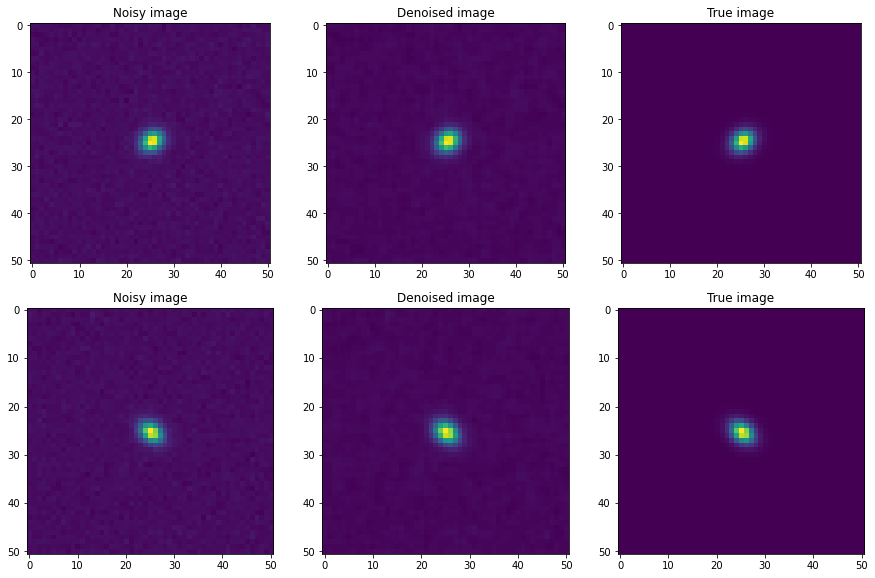

In [8]:
one_star_noiseless = model.predict(im_val)[1400,:,:]
one_star_noise = im_val[1400,:,:]
one_star_truth = target_val[1400,:,:]
second_star_noiseless = model.predict(im_val)[0,:,:]
second_star_noise = im_val[0,:,:]
second_star_truth = target_val[0,:,:]


fig = plt.figure(num=0, figsize=(15,15))
ax1 = fig.add_subplot(1,3,1)
ax1.title.set_text('Noisy image')
im1 = ax1.imshow(one_star_noise, interpolation='None')
ax2 = fig.add_subplot(1,3,2)
im2 = ax2.imshow(one_star_noiseless, interpolation='None')
ax2.title.set_text('Denoised image')
ax3 = fig.add_subplot(1,3,3)
im3 = ax3.imshow(one_star_truth, interpolation='None')
ax3.title.set_text('True image')
ax4 = fig.add_subplot(3,3,1)
ax4.title.set_text('Noisy image')
im4 = ax4.imshow(second_star_noise, interpolation='None')
ax5 = fig.add_subplot(3,3,2)
im5 = ax5.imshow(second_star_noiseless, interpolation='None')
ax5.title.set_text('Denoised image')
ax6 = fig.add_subplot(3,3,3)
im6 = ax6.imshow(second_star_truth, interpolation='None')
ax6.title.set_text('True image')

